<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Amirali Pourdehghan

**Student ID**: 400107553





## Importing Libraries

First we import libraries that we need for this assignment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import any other libraries needed below

In [2]:
## Write your code here ##
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
from google.colab import files
uploaded = files.upload()


Saving data_logistic.csv to data_logistic.csv


In [4]:
import shutil
shutil.move("data_logistic.csv", "/content/drive/My Drive/data_logistic.csv")


'/content/drive/My Drive/data_logistic.csv'

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the features of the data (`X1`, `X2`, `X3`) and the class (`Y`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [5]:
import pandas as pd

# Read data from CSV file
data = pd.read_csv("/content/drive/My Drive/data_logistic.csv")

# Extract features and target variable
X = data[['X1', 'X2', 'X3']].values
Y = data['Y'].values.reshape(-1, 1)  # Reshape Y to make it a column vector

print(X.shape)
print(Y.shape)


(10000, 3)
(10000, 1)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**:

In [6]:
### START CODE HERE ###
# Calculate mean and standard deviation for each feature in X
mean_X = X.mean(axis=0)
std_X = X.std(axis=0)

# Normalize X
X_norm = (X - mean_X) / std_X

# Normalize Y using the same mean and standard deviation of X1
Y_norm = (Y - mean_X[0]) / std_X[0]

print(X_norm.shape)
print(Y_norm.shape)

### END CODE HERE ###

(10000, 3)
(10000, 1)


Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [7]:
### START CODE HERE ###
import numpy as np

# Add a column of ones to represent the bias term
X_with_bias = np.hstack((np.ones((X_norm.shape[0], 1)), X_norm))

print(X_with_bias.shape)

### END CODE HERE ###



(10000, 4)


## Training Model

### Sigmoid Function
You should begin by implementing the $\sigma(\mathbf{x})$ function. Recall that the logistic regression hypothesis $\mathcal{h}()$ is defined as:
$$
\mathcal{h}_{\theta}(\mathbf{x}) = \mathcal{g}(\theta^\mathbf{T}\mathbf{x})
$$
where $\mathcal{g}()$ is the sigmoid function as:
$$
\mathcal{g}(\mathbf{z}) = \frac{1}{1+exp^{-\mathbf{z}}}
$$
The Sigmoid function has the property that $\mathbf{g}(+\infty)\approx 1$ and $\mathcal{g}(−\infty)\approx0$. Test your function by calling `sigmoid(z)` on different test samples. Be certain that your sigmoid function works with both vectors and matrices - for either a vector or a matrix, your function should perform the sigmoid function on every element.

In [8]:
import numpy as np

def sigmoid(z):
    """
    Compute the sigmoid function for the input z.

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1 / (1 + np.exp(-z))
    return s

# Test the sigmoid function with different test samples
test_scalar = 0
test_vector = np.array([-1, 0, 1])
test_matrix = np.array([[-1, 0, 1], [-2, -1, 0]])

print("Sigmoid of scalar {}: {}".format(test_scalar, sigmoid(test_scalar)))
print("Sigmoid of vector {}: {}".format(test_vector, sigmoid(test_vector)))
print("Sigmoid of matrix:\n", sigmoid(test_matrix))


Sigmoid of scalar 0: 0.5
Sigmoid of vector [-1  0  1]: [0.26894142 0.5        0.73105858]
Sigmoid of matrix:
 [[0.26894142 0.5        0.73105858]
 [0.11920292 0.26894142 0.5       ]]


### Cost Function
Implement the functions to compute the cost function. Recall the cost function for logistic regression is a scalar value given by:
$$
\mathcal{J}(\theta) = \sum_{i=1}^{n}[-y^{(i)}\log{(\mathcal{h}_\theta(\mathbf{x}^{(i)}))}-(1-y^{(i)})\log{(1-\mathcal{h}_\theta(\mathbf{x}^{(i)}))}] + \frac{\lambda}{2}||\theta||_2^2
$$

In [26]:
def computeCost(theta, X, y, regLambda):
    '''
    Computes the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
    '''

    m, n = X.shape
    loss = None
    h = sigmoid(np.dot(X, theta))

    # Exclude instances where h is exactly 0 or 1
    h = np.clip(h, 1e-15, 1 - 1e-15)

    # Compute loss
    regularizer = (regLambda / (2 * m)) * np.sum(theta[1:] ** 2)  # Exclude bias term
    loss = -(1 / m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) + regularizer

    return loss


### Gradient of the Cost Function
Now, we want to calculate the gradient of the cost function. The gradient of the cost function is a d-dimensional vector.\
We must be careful not to regularize the $\theta_0$ parameter (corresponding to the first feature we add to each instance), and so the 0's element is given by:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_0} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})
$$

Question: What is the answer to this problem for the $j^{th}$ element (for $j=1...d$)?

Answer:
For the $ j^{th} $ element of the gradient of the cost function $ ( \frac{\partial \mathcal{J}(\theta)}{\partial \theta_j} $ for $( j = 1, ..., d ))$, where $ d $ is the number of features, the formula is:

$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_j} = \sum_{i=1}^m (\mathcal{h}_\theta(\mathbf{x}^{(i)}) - y^{(i)}) \cdot x_j^{(i)}
$$

This expression represents the partial derivative of the cost function with respect to the $j^{th}$ parameter$ \theta_j $. Here's a breakdown of the terms:

- $ m $ is the number of training examples.
- $ \mathcal{h}_\theta(\mathbf{x}^{(i)}) $ is the hypothesis function for the $ i^{th} $ training example.
- $ y^{(i)} $ is the actual label for the $ i^{th} $ training example.
- $ x_j^{(i)} $ is the $ j^{th} $ feature value for the $ i^{th} $ training example.

This formula calculates the error between the predicted and actual values for each training example, weighted by the corresponding feature value, and sums them up across all training examples. This represents the contribution of the $ j^{th} $ feature to the overall error, which is then used to update the corresponding parameter $ \theta_j $ during gradient descent.




In [10]:
def computeGradient(theta, X, y, regLambda):
    '''
    Computes the gradient of the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        the gradient, an d-dimensional vector
    '''

    m, n = X.shape
    h = sigmoid(np.dot(X, theta))
    error = h - y
    regularizer = (regLambda / m) * theta
    regularizer[0] = 0  # Exclude regularization for bias term (theta_0)

    grad = (1 / m) * np.dot(X.T, error) + regularizer

    return grad


### Training and Prediction
Once you have the cost and gradient functions complete, implemen tthe fit and predict methods.\
Your fit method should train the model via gradient descent, relying on the cost and gradient functions. This function should return two parameters. The first parameter is $\theta$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code.\
Instead of simply running gradient descent for a specific number of iterations, we will use a more sophisticated method: we will stop it after the solution hasconverged. Stop the gradient descent procedure when $\theta$ stops changing between consecutive iterations. You can detect this convergence when:
$$
||\theta_{new}-\theta_{old}||_2 <= \epsilon,
$$
for some small $\epsilon$ (e.g, $\epsilon=10E-4$).\
For readability, we’d recommend implementing this convergence test as a dedicated function `hasConverged`.

In [24]:
def fit(X, y, regLambda=0.01, alpha=0.01, epsilon=1e-4, maxNumIters=100):
    '''
    Trains the model
    Arguments:
        X           is a n-by-d numpy matrix
        y           is an n-dimensional numpy vector
        maxNumIters is the maximum number of gradient descent iterations
        regLambda   is the scalar regularization constant
        epsilon     is the convergence rate
        alpha       is the gradient descent learning rate
    '''

    m, n = X.shape
    theta = np.zeros((n, 1))
    loss_history = []

    for _ in range(maxNumIters):
        # Calculate gradient
        gradient = computeGradient(theta, X, y, regLambda)

        # Update theta
        theta -= alpha * gradient

        # Calculate loss
        loss = computeCost(theta, X, y, regLambda)
        loss_history.append(loss)

        # Check convergence
        theta_new = theta - alpha * gradient
        if hasConverged(theta, theta_new, epsilon):
            break

        theta = theta_new

    return theta, np.array(loss_history)

def hasConverged(theta_old, theta_new, epsilon):
    '''
    Return if the theta converged or not
    Arguments:
        theta_old   is the theta calculated in previous iteration
        theta_new   is the theta calculated in current iteration
        epsilon     is the convergence rate
    '''
    return np.linalg.norm(theta_old - theta_new) <= epsilon


Finally, we want to evaluate our loss for this problem. Complete the cell below to calculate and print the loss of each iteration and the final theta of your model.

In [12]:
# Assuming X, Y, regLambda, alpha, epsilon, and maxNumIters are defined earlier

# Fit the model
theta, loss_history = fit(X_with_bias, Y, regLambda=0.01, alpha=0.01, epsilon=1e-4, maxNumIters=100)

# Print loss for each iteration
for i, loss in enumerate(loss_history):
    print("Iteration {}: Loss = {:.4f}".format(i+1, loss))

# Print final theta
print("\nFinal Theta:")
print(theta)


Iteration 1: Loss = 0.6915
Iteration 2: Loss = 0.6898
Iteration 3: Loss = 0.6882
Iteration 4: Loss = 0.6866
Iteration 5: Loss = 0.6849
Iteration 6: Loss = 0.6833
Iteration 7: Loss = 0.6817
Iteration 8: Loss = 0.6801
Iteration 9: Loss = 0.6785
Iteration 10: Loss = 0.6769
Iteration 11: Loss = 0.6753
Iteration 12: Loss = 0.6738
Iteration 13: Loss = 0.6722
Iteration 14: Loss = 0.6706
Iteration 15: Loss = 0.6691
Iteration 16: Loss = 0.6676
Iteration 17: Loss = 0.6660
Iteration 18: Loss = 0.6645
Iteration 19: Loss = 0.6630
Iteration 20: Loss = 0.6615
Iteration 21: Loss = 0.6600
Iteration 22: Loss = 0.6585
Iteration 23: Loss = 0.6570
Iteration 24: Loss = 0.6555
Iteration 25: Loss = 0.6541
Iteration 26: Loss = 0.6526
Iteration 27: Loss = 0.6511
Iteration 28: Loss = 0.6497
Iteration 29: Loss = 0.6482
Iteration 30: Loss = 0.6468
Iteration 31: Loss = 0.6454
Iteration 32: Loss = 0.6440
Iteration 33: Loss = 0.6425
Iteration 34: Loss = 0.6411
Iteration 35: Loss = 0.6397
Iteration 36: Loss = 0.6383
I

### Testing Your Implementation
To test your logistic regression implementation, first you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [13]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (70%), validation (20%), and test (10%) sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.33, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)


Training set shape: (7000, 3)
Validation set shape: (2010, 3)
Test set shape: (990, 3)


Then, you should complete `predict` function to find the weight vector and the loss on the test data.

In [14]:
def predict(X, theta):
    '''
    Use the model to predict values for each instance in X
    Arguments:
        theta is d-dimensional numpy vector
        X     is a n-by-d numpy matrix
    Returns:
        an n-dimensional numpy vector of the predictions, the output should be binary (use h_theta > .5)
    '''

    # Compute the predicted probabilities
    probabilities = sigmoid(np.dot(X, theta))

    # Convert probabilities to binary predictions
    Y = (probabilities > 0.5).astype(int)

    return Y


Now, run the `fit` and `predict` function for different values of the learning rate and regularization constant. Plot the `loss_history` of these different values for train and test data both in the same figure.

**Question**: Discuss the effect of the learning rate and regularization constant and find the best values of these parameters.

**Answer**:
The learning rate and regularization constant are crucial hyperparameters in training machine learning models like logistic regression. Here's how they affect the training process:

1. **Learning Rate**:
   - The learning rate controls the size of the steps taken during gradient descent. A larger learning rate means larger steps, which can lead to faster convergence but may overshoot the minimum of the loss function. Conversely, a smaller learning rate results in smaller steps, which may converge more slowly but with more precision.
   - If the learning rate is too small, the algorithm may converge very slowly, requiring many iterations to reach the minimum loss. On the other hand, if the learning rate is too large, the algorithm may fail to converge, oscillating around the minimum or even diverging.
   - Generally, it's a good practice to start with a moderate learning rate and adjust it based on the observed convergence behavior. Techniques like learning rate schedules or adaptive learning rate methods (e.g., Adam, RMSProp) can also be used to dynamically adjust the learning rate during training.

2. **Regularization Constant**:
   - The regularization constant (also known as lambda or alpha) controls the amount of regularization applied to the model. Regularization helps prevent overfitting by penalizing large coefficients in the model.
   - A smaller regularization constant means less regularization, allowing the model to fit the training data more closely. However, this may lead to overfitting, especially if the training data is noisy or contains outliers.
   - Conversely, a larger regularization constant increases the regularization penalty, forcing the model to learn simpler patterns and reducing the risk of overfitting. However, excessive regularization may lead to underfitting, where the model is too simple to capture the underlying patterns in the data.
   - Cross-validation or grid search techniques can be used to find the optimal value of the regularization constant by evaluating the model's performance on a validation set.

To find the best values for these parameters:
- Experiment with different values of the learning rate and regularization constant.
- Monitor the convergence behavior and performance of the model on both the training and validation/test sets.
- Choose the values that result in the fastest convergence with the lowest loss on the validation/test set, balancing between underfitting and overfitting.

It's important to note that the optimal values of the learning rate and regularization constant may vary depending on the specific dataset and problem at hand. Therefore, it's often necessary to perform hyperparameter tuning to find the best combination for each scenario.

Training model with LR=0.01, RegLambda=0.01
Training model with LR=0.01, RegLambda=0.1
Training model with LR=0.01, RegLambda=1
Training model with LR=0.1, RegLambda=0.01
Training model with LR=0.1, RegLambda=0.1
Training model with LR=0.1, RegLambda=1
Training model with LR=1, RegLambda=0.01
Training model with LR=1, RegLambda=0.1
Training model with LR=1, RegLambda=1


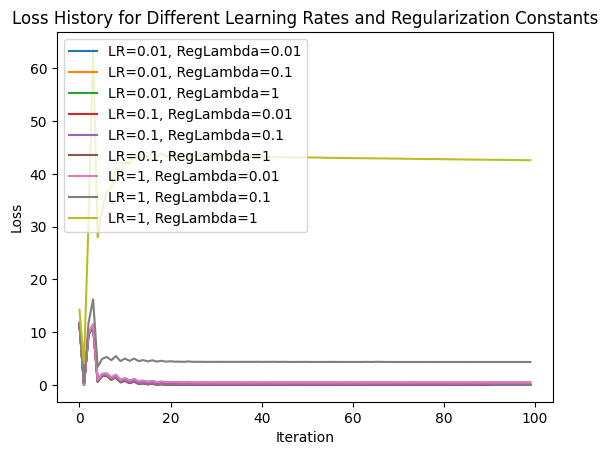

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    """
    Compute the sigmoid function with a small constant added to prevent division by zero
    """
    # Clip input to avoid overflow or underflow
    z = np.clip(z, -500, 500)
    # Compute sigmoid with a small constant added
    return 1 / (1 + np.exp(-z + 1e-6))

# Define a range of values for the learning rate and regularization constant
learning_rates = [0.01, 0.1, 1]
reg_lambdas = [0.01, 0.1, 1]

# Iterate over all combinations of learning rate and regularization constant
for lr in learning_rates:
    for reg_lambda in reg_lambdas:
        print(f"Training model with LR={lr}, RegLambda={reg_lambda}")

        # Train the model using the fit function
        theta, loss_history = fit(X_train, Y_train, regLambda=reg_lambda, alpha=lr)

        # Plot loss history
        # Plot loss history
        plt.plot(loss_history.flatten(), label=f"LR={lr}, RegLambda={reg_lambda}")


# Add labels and legend
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss History for Different Learning Rates and Regularization Constants')
plt.legend()
plt.show()


## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:


In [30]:
from sklearn.naive_bayes import GaussianNB

# Train the classifier on the training set
gnb = GaussianNB()
gnb.fit(X_train, Y_train.ravel())

# Predict the labels for the test set
y_pred = gnb.predict(X_test)

# Calculate the accuracy
accuracy = np.mean(y_pred == Y_test.ravel())
print("Accuracy of Gaussian Naive Bayes:", accuracy)


Accuracy of Gaussian Naive Bayes: 0.9282828282828283


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Flatten the target vectors
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

# Train the classifier on the training set
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

# Predict the labels for the test set
y_pred_lda = lda.predict(X_test)

# Calculate the accuracy
accuracy_lda = np.mean(y_pred_lda == Y_test)
print("Accuracy of Linear Discriminant Analysis:", accuracy_lda)


Accuracy of Linear Discriminant Analysis: 0.9848484848484849


## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**:
Based on the accuracies obtained on the test set:

1. **Gaussian Naive Bayes**: Accuracy ≈ 0.928
2. **Linear Discriminant Analysis (LDA)**: Accuracy ≈ 0.985

The best method for classifying this dataset appears to be Linear Discriminant Analysis (LDA), as it achieved a higher accuracy of approximately 98.5% on the test set compared to Gaussian Naive Bayes.

Therefore, the best accuracy on the test set is achieved by Linear Discriminant Analysis (LDA), with an accuracy of approximately 98.5%. LDA is more effective for this particular dataset in distinguishing between the classes and making accurate predictions.